<center><img src="https://i.ibb.co/yqymhWY/unnamed-pic-32ratio-1200x800-1200x800-80570.jpg" width=325px></center>
<p style="font-family: 'JetBrains Mono'; font-weight: bold; font-size: 200%; color: #4A4B52; text-align: center"> An introduction to 👨‍💻 HeadHunter vacancies. </p>



<p style="
    font-size: 32px;
    font-family: 'JetBrains Mono';
    color: #4A4B52;
">
    <b>About</b> 📙
</p>

<p style="
    font-size: 22px;
    font-family: 'JetBrains Mono';
">
    This is my little pet project that I did for myself and decided to share with the kaggle community. 
The problem statement was that I've been trying to find a job for a couple of months now in data analytics and as an analyst it's worth exploring the job market. 
So I made a web scraper and will do an analysis with some visualization, hope you like it.</i>
</p>
    

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('/kaggle/input/headhunter-vacancies-for-data-search/vacancies.csv')

<p style="
    font-size: 32px;
    font-family: 'JetBrains Mono';
    color: #4A4B52;
">
    <b>First of all, let's check the missing values</b> 
</p>

In [3]:
df.head(10)

,name,tags,link,experience,lower_salary,upper_salary,currency
0,Ведущий менеджер по продажам,"['Активные продажи', 'Ведение переговоров', 'Т...",https://adsrv.hh.ru/click?b=533104&c=7&place=3...,Требуемый опыт работы: не требуется,150000.0,150000.0,₽
1,Data Scientist (команда Поиска),"['Python', 'PyTorch', 'SQL', 'Machine Learning...",https://saratov.hh.ru/vacancy/83116089?from=va...,Требуемый опыт работы: 3–6 лет,350000.0,350000.0,₽
2,Data Scientist в b2c направление,"['Python', 'Machine Learning', 'SQL', 'PyTorch...",https://saratov.hh.ru/vacancy/84009554?from=va...,Требуемый опыт работы: 3–6 лет,NaN,NaN,NaN
3,Портфельный риск-аналитик / Middle Data Scient...,[],https://saratov.hh.ru/vacancy/82421077?from=va...,Требуемый опыт работы: 3–6 лет,NaN,NaN,NaN
4,Трафик-менеджер,"['Анализ трафика', 'Аналитика', 'Маркетинг', '...",https://saratov.hh.ru/vacancy/84386152?from=va...,Требуемый опыт работы: 3–6 лет,110000.0,140000.0,₽
5,Data scientist,[],https://saratov.hh.ru/vacancy/85899697?from=va...,Требуемый опыт работы: 3–6 лет,NaN,NaN,NaN
6,Data Engineer,[],https://saratov.hh.ru/vacancy/85895055?from=va...,Требуемый опыт работы: 3–6 лет,250000.0,250000.0,₽
7,Data analyst,"['SQL', 'Анализ данных', 'Clickhouse', 'SuperS...",https://saratov.hh.ru/vacancy/85894739?from=va...,Требуемый опыт работы: 1–3 года,NaN,NaN,NaN
8,Data Engineer,"['Hadoop', 'Hive', 'Linux', 'SQL', 'PostgreSQL...",https://saratov.hh.ru/vacancy/84377474?from=va...,Требуемый опыт работы: 1–3 года,NaN,NaN,NaN
9,Data Analyst,"['Python', 'ETL', 'SQL', 'Работа с большим объ...",https://saratov.hh.ru/vacancy/84685857?from=va...,Требуемый опыт работы: 1–3 года,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          797 non-null    object 
 1   tags          800 non-null    object 
 2   link          800 non-null    object 
 3   experience    797 non-null    object 
 4   lower_salary  187 non-null    float64
 5   upper_salary  187 non-null    float64
 6   currency      160 non-null    object 
dtypes: float64(2), object(5)
memory usage: 43.9+ KB


Text(50.722222222222214, 0.5, 'Values in dataset')

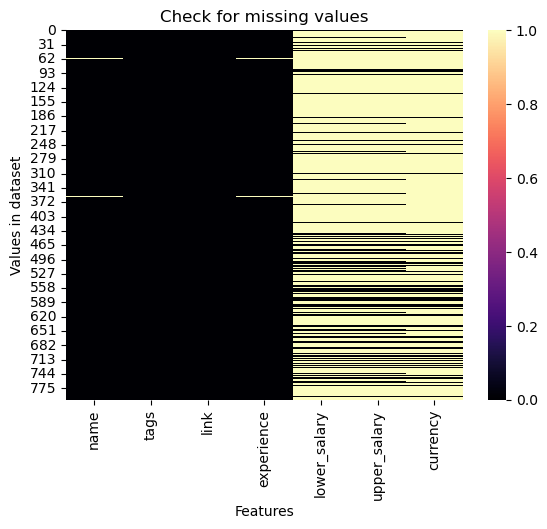

In [5]:
sns.heatmap(df.isnull(), cmap = 'magma')
plt.gca().set_title('Check for missing values')
plt.xlabel('Features')
plt.ylabel('Values in dataset')

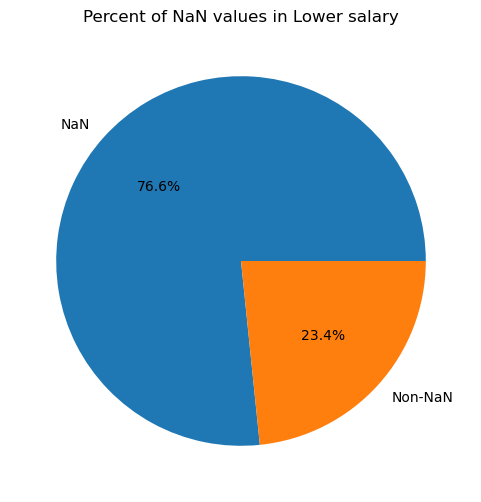

In [6]:
nan_count = df['lower_salary'].isna().sum().sum()

total_count = df['lower_salary'].size

plt.figure(figsize=(6, 6))
plt.pie([nan_count, total_count - nan_count], labels=['NaN', 'Non-NaN'], autopct='%1.1f%%')
plt.title('Percent of NaN values in Lower salary')
plt.show()

<p style="
    font-size: 32px;
    font-family: 'JetBrains Mono';
    color: #4A4B52;
">
    <b>What's interesting is that almost 80% of job openings have no open salary.</b> 
</p>

<p style="
    font-size: 22px;
    font-family: 'JetBrains Mono';
">
    Here are my thoughts on why that might be the case:
    
* Some employers may prefer not to include specific salary figures in job postings. They may prefer to discuss salary in an interview or after a candidate expresses interest in the position.
* The vacancy may be an internship or volunteer position where the salary may be nonexistent or token.
* Some jobs may offer flexible pay, such as commission or performance-based compensation. In such cases, the salary may depend on the employee's performance.</i>
</p>

<p style="
    font-size: 32px;
    font-family: 'JetBrains Mono';
    color: #4A4B52;
">
    <b>Since I don't have work experience (yet), let's explore what skills are required for such jobs.</b> 
</p>

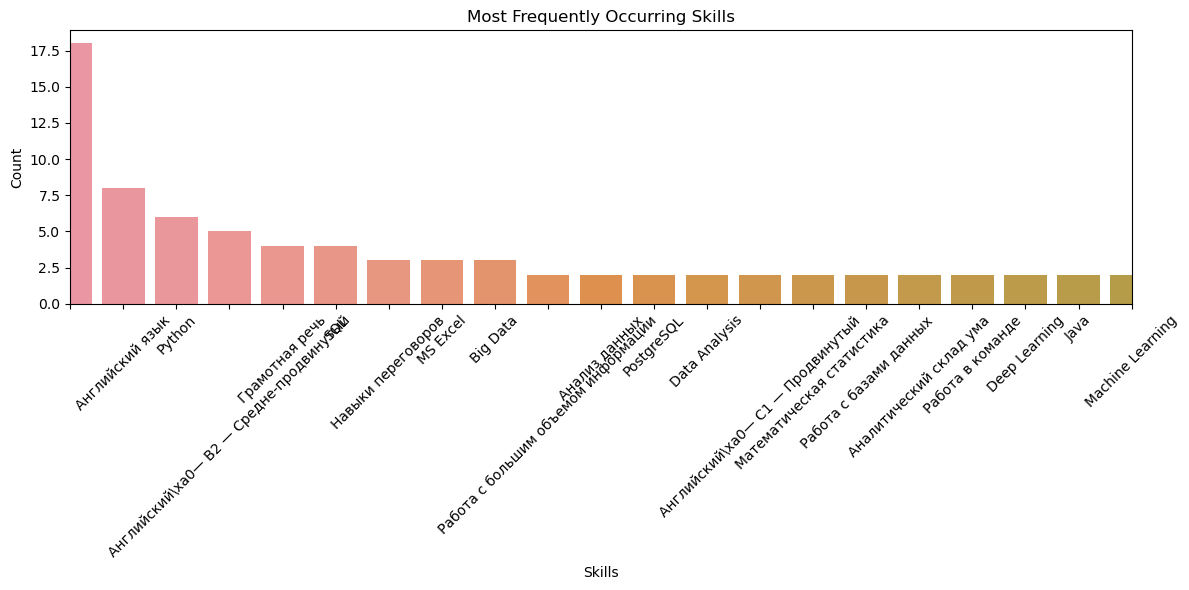

In [7]:
skills_count = {}

# Skill frequency count
for skills_list in df['tags'][df['experience'] == 'Требуемый опыт работы: не требуется']:
        skills_list = skills_list.strip('[]')
        items = skills_list.split(',')
        items = [item.strip() for item in items]
        items = [item.strip('\'') for item in items]
        for skill in items:
            if skill in skills_count:
                skills_count[skill] += 1
            else:
                skills_count[skill] = 1

# Converting a dictionary to a DataFrame
skills_df = pd.DataFrame.from_dict(skills_count, orient='index', columns=['count'])
skills_df = skills_df.sort_values(by='count', ascending=False)
skills_df = skills_df[skills_df.index != ' ']

plt.figure(figsize=(12, 6)) 
sns.barplot(x=skills_df.index, y=skills_df['count'])
plt.xticks(rotation=45)
plt.xlabel('Skills')
plt.ylabel('Count')
plt.title('Most Frequently Occurring Skills')
plt.xlim(0, 20)  
plt.tight_layout()  
plt.show()

In [8]:
df[df['experience'] == 'Требуемый опыт работы: не требуется'].count()

name            42
tags            42
link            42
experience      42
lower_salary    26
upper_salary    26
currency        24
dtype: int64

In [9]:
skills_df.head(10)

,count
,18
Английский язык,8
Python,6
Английский\xa0— B2 — Средне-продвинутый,5
Грамотная речь,4
SQL,4
Навыки переговоров,3
MS Excel,3
Big Data,3
Работа с большим объемом информации,2


<p style="
    font-size: 32px;
    font-family: 'JetBrains Mono';
    color: #4A4B52;
">
    <b>Out of 800 jobs, only 42 of them don't require experience...</b> 
</p>

<p style="
    font-size: 22px;
    font-family: 'JetBrains Mono';
">
    It's really sad that it's pretty hard to get a job without experience. Besides, there is a huge competition of labor on the junior market. 
So out of 42 vacancies, 8 require English, 6 python, sql 4. 
Honestly, from the obtained data is not very clear, let's try to see what happens if we put more experience "from 1 to 3 years".</i>
</p>

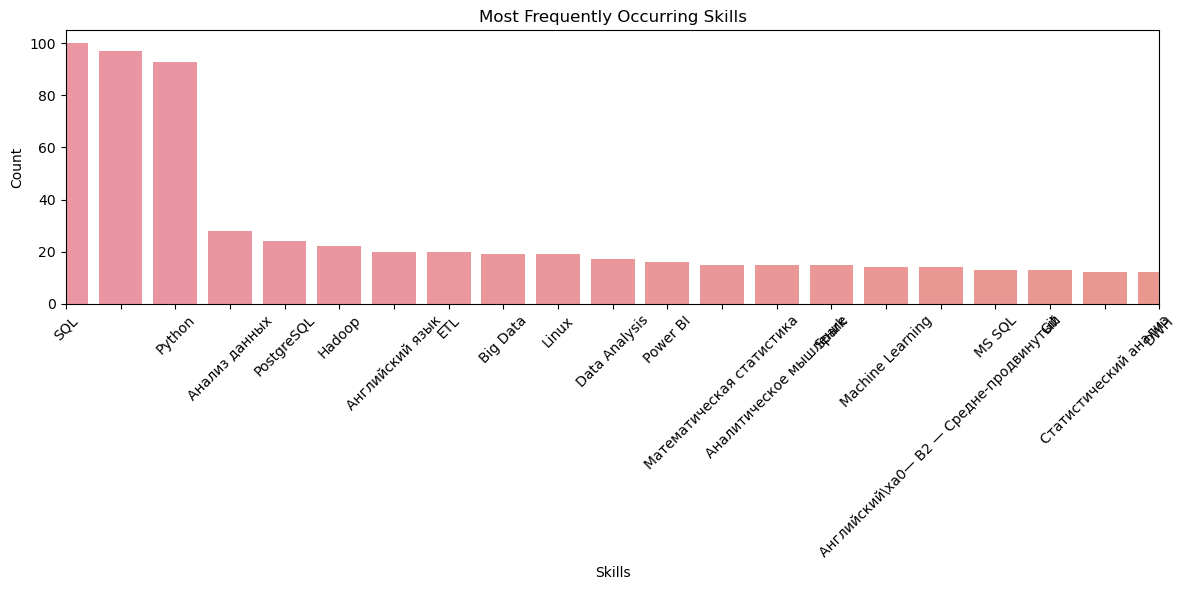

In [10]:
skills_count = {}

# Skill frequency count
for skills_list in df['tags'][df['experience'] == 'Требуемый опыт работы: 1–3 года']:
        skills_list = skills_list.strip('[]')
        items = skills_list.split(',')
        items = [item.strip() for item in items]
        items = [item.strip('\'') for item in items]
        for skill in items:
            if skill in skills_count:
                skills_count[skill] += 1
            else:
                skills_count[skill] = 1

# Converting a dictionary to a DataFrame
skills_df = pd.DataFrame.from_dict(skills_count, orient='index', columns=['count'])
skills_df = skills_df.sort_values(by='count', ascending=False)
skills_df = skills_df[skills_df.index != ' ']

plt.figure(figsize=(12, 6)) 
sns.barplot(x=skills_df.index, y=skills_df['count'])
plt.xticks(rotation=45)
plt.xlabel('Skills')
plt.ylabel('Count')
plt.title('Most Frequently Occurring Skills')
plt.xlim(0, 20)  
plt.tight_layout()  
plt.show()

In [11]:
df[df['experience'] == 'Требуемый опыт работы: 1–3 года'].count()

name            308
tags            308
link            308
experience      308
lower_salary     59
upper_salary     59
currency         54
dtype: int64

In [12]:
skills_df.head(15)

,count
SQL,100
,97
Python,93
Анализ данных,28
PostgreSQL,24
Hadoop,22
Английский язык,20
ETL,20
Big Data,19
Linux,19


<p style="
    font-size: 32px;
    font-family: 'JetBrains Mono';
    color: #4A4B52;
">
    <b>Now it's looking more interesting.</b> 
</p>

<p style="
    font-size: 22px;
    font-family: 'JetBrains Mono';
">
    SQL and python are expectedly in the lead, then comes the "Data Analysis" skill, which can be interpreted in different ways, then come the various skills of data engineers like hadoop.</i>
</p>




<p style="
    font-size: 40px;
    font-family: 'JetBrains Mono';
    color: #4A4B52;
">
    <b>I will only look forward!</b> 
</p>

<p style="
    font-size: 22px;
    font-family: 'JetBrains Mono';
">
    It was an interesting experience.
<p style="
    font-size: 22px;
    font-family: 'JetBrains Mono';
">
    I scraped the data myself, cleaned it up as best I could and here is some analysis that I think will help me with my job search. 

<p style="
    font-size: 22px;
    font-family: 'JetBrains Mono';
">
    It is still possible to play with this dataset further, for example, predicting salary based on skills or work experience or all together.

<p style="
    font-size: 22px;
    font-family: 'JetBrains Mono';
">
    Having completed this research, I would conclude that as an unemployed person trying to get into the lowest position in analytics, it is worth focusing on the main core skills of python and SQL, as out of 330 jobs with 1 to 3 years of experience, about 110 jobs require these basic skills. 
Also, it's pretty shocking that out of 800 jobs, only 42 of them don't require experience. Which I think says a lot about the current state of the labor market.</i>
</p>
